# import библиотек

In [ ]:
#загрузка библиотек и модулей
import pandas as pd # для работы с таблицами
import numpy as np # для подготовки данных под обучение модели
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
import matplotlib.pyplot as plt # для визуализации данных
from sklearn.preprocessing import PolynomialFeatures # для создания доп фич
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay # для подсчета метрик

# Загрузка данных

In [ ]:
#распаковка архива
!unzip '/content/drive/MyDrive/data science/ML/деревья и случайный лес/archive.zip'

Archive:  /content/drive/MyDrive/data science/ML/деревья и случайный лес/archive.zip
  inflating: creditcard.csv          


In [ ]:
#загрузка данных
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#просмотр формата данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#проверка на пропуски
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#проверка на дубликаты
data.duplicated().sum()

1081

In [ ]:
#много дубликатов удаляем их
data = data.drop_duplicates()
data.duplicated().sum()

0

# Первичный анализ данных


In [ ]:
#анализ значений
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


(array([[2.81891e+05, 1.42300e+03, 2.74000e+02, 8.60000e+01, 2.20000e+01,
         1.40000e+01, 8.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00],
        [2.83726e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]]),
 array([    0.   ,  1284.558,  2569.116,  3853.674,  5138.232,  6422.79 ,
         7707.348,  8991.906, 10276.464, 11561.022, 12845.58 , 14130.138,
        15414.696, 16699.254, 17983.812, 19268.37 , 20552.928, 21837.486,
        23122.044, 24406.602, 25691.16 ]),
 <a list of 2 BarContainer objects>)

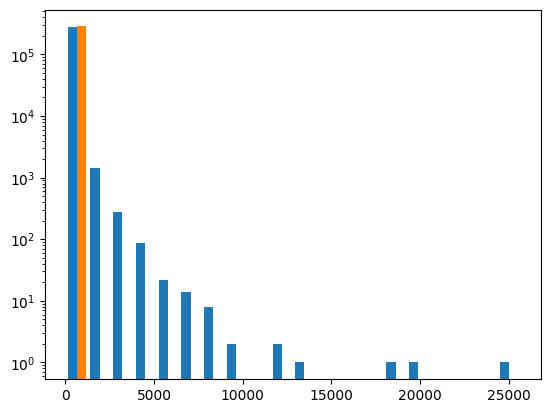

In [ ]:
plt.hist((data.Amount, data.Class), log=True, bins = 20)

Все мошеннические операции на маленькие суммы.

Все операции более чем на 10 тысяч можно считать выбросами.

In [ ]:
#дропаем выбросы
data = data[data.Amount < 10000]
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


(array([[  6791.,   3677.,   4174.,  12715.,  19831.,  18540.,  18781.,
          19611.,  21079.,  19032.,   6402.,   3694.,   4248.,  12866.,
          20067.,  18779.,  20527.,  20077.,  18674.,  14153.],
        [283718.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.]]),
 array([     0. ,   8639.6,  17279.2,  25918.8,  34558.4,  43198. ,
         51837.6,  60477.2,  69116.8,  77756.4,  86396. ,  95035.6,
        103675.2, 112314.8, 120954.4, 129594. , 138233.6, 146873.2,
        155512.8, 164152.4, 172792. ]),
 <a list of 2 BarContainer objects>)

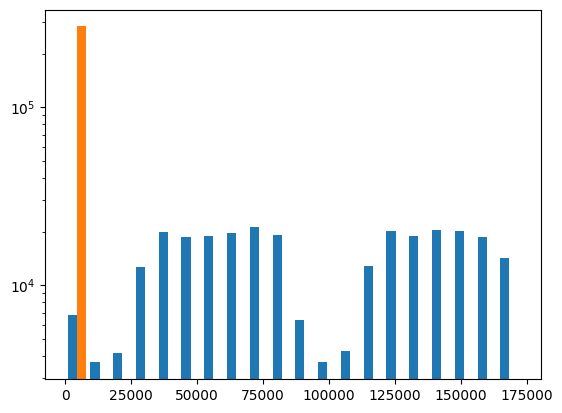

In [ ]:
plt.hist((data.Time, data.Class), log=True, bins = 20)

Операции на зависят от времени, мы можем дропнуть колонку Time без последствий при обучении.

In [ ]:
#дропаем колонку Time
data = data.drop('Time', axis = 1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


(array([283245.,    473.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

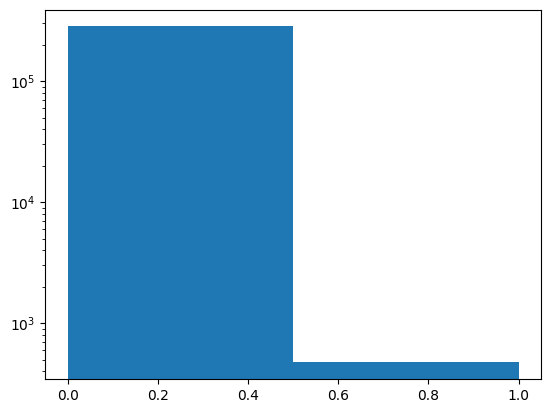

In [ ]:
plt.hist((data.Class), log=True, bins = 2)

In [ ]:
(data.Class == 1).sum() / len(data)

0.0016671483656306614

In [ ]:
(data.Class == 0).sum() / len(data)

0.9983328516343694

В данных очень мало мошеннических операций, меньше одного процента. При разделение на трейн и тест, надо будет использовать stratify.

In [ ]:
#разделение выборки на X и y
X = data.drop('Class', axis = 1)
y = data.Class

In [ ]:
#просмотр X
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
#просмотр y
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283718, dtype: int64

In [ ]:
#X, y to numpy array
X = np.asarray(X)
y = np.asarray(y)

Поскольку у нас мало мошеннических операций, нам нужно выделить больше данных на train и применить stratify для равномерного распределения данных.

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    shuffle=True)

In [ ]:
# train shape
print(X_train.shape)
print(y_train.shape)

(226974, 29)
(226974,)


In [ ]:
# test shape
print(X_test.shape)
print(y_test.shape)

(56744, 29)
(56744,)


# создание и обучение модели

Для подобной задачи в подборе гиперпараметров нет необходимости

## Подбор параметров, выбор лучшей модели

In [ ]:
size = len(X_train[0])
size

29

Первоначально в качестве глубины дерева установим 5

Число деревьев будет равно количеству признаков (size)

На одно дерево будет один признак

Установим seed равный 0

In [ ]:
# создание модели и подбор параметров
clf5 = RandomForestClassifier(max_depth=5, # максимальная глубина дерева
                             n_estimators = size, # число деревьев в лесу
                             max_features=1, # максимальное число признаков для каждого дерева
                             random_state=0 # начальное положение
                             )

In [ ]:
# обучение модели
clf5 = clf5.fit(X_train, y_train)

In [ ]:
# вывод score
score = clf5.score(X_test, y_test) # считаем среднюю точность
print(score)

0.9989602424925983


score получился неплохой, попробуем увеличить глубину  дерева до 10 чтобы его улучшить

In [ ]:
# создание модели и подбор параметров
clf10 = RandomForestClassifier(max_depth=10, # максимальная глубина дерева
                             n_estimators = size, # число деревьев в лесу
                             max_features=1, # максимальное число признаков для каждого дерева
                             random_state=0 # начальное положение
                             )

In [ ]:
# обучение модели
clf10 = clf10.fit(X_train, y_train)

In [ ]:
# вывод score
score = clf10.score(X_test, y_test) # считаем среднюю точность
print(score)

0.9992950796559988


score увеличился, попробуем увеличить глубину дерева до 15 чтобы его улучшить

In [ ]:
# создание модели и подбор параметров
clf15 = RandomForestClassifier(max_depth=15, # максимальная глубина дерева
                             n_estimators = size, # число деревьев в лесу
                             max_features=1, # максимальное число признаков для каждого дерева
                             random_state=0 # начальное положение
                             )

In [ ]:
# обучение модели
clf15 = clf15.fit(X_train, y_train)

In [ ]:
# вывод score
score = clf15.score(X_test, y_test) # считаем среднюю точность
print(score)

0.999347948681799


score увеличился, попробуем увеличить глубину дерева до 20 чтобы его улучшить

In [ ]:
# создание модели и подбор параметров
clf20 = RandomForestClassifier(max_depth=20, # максимальная глубина дерева
                             n_estimators = size, # число деревьев в лесу
                             max_features=1, # максимальное число признаков для каждого дерева
                             random_state=0 # начальное положение
                             )

In [ ]:
# обучение модели
clf20 = clf20.fit(X_train, y_train)

In [ ]:
# вывод score
score = clf20.score(X_test, y_test) # считаем среднюю точность
print(score)

0.9993303256731989


score уменьшился(в бльшинстве случаев)

Мы выяснили что лучший score с глубиной равной 15, не всегда, но в большинстве случаев. Даже если у clf20 score больше, то не намного. Это делает модель clf15 самой стабильной.

Попробуем добавить полиномиальных фич и протестировать с ними

In [ ]:
# добавление полиномиальных признаков
poly = PolynomialFeatures(2)
XP_train = poly.fit_transform(X_train)
XP_test = poly.transform(X_test)

In [ ]:
print(XP_train.shape)
print(XP_test.shape)

(226974, 465)
(56744, 465)


In [ ]:
psize = len(XP_train[0])
psize

465

In [ ]:
# создание модели и подбор параметров
clfp = RandomForestClassifier(max_depth=15, # максимальная глубина дерева
                             n_estimators = psize, # число деревьев в лесу
                             max_features=1, # максимальное число признаков для каждого дерева
                             random_state=0 # начальное положение
                             )

In [ ]:
# обучение модели
clfp = clfp.fit(XP_train, y_train)

In [ ]:
# вывод score
score = clfp.score(XP_test, y_test) # считаем среднюю точность
print(score)

0.9991893416043987


С фичами score уменьшился, их использование не имеет смысла.

Лучше всего себя показала модель **clf15**, её мы будем использовать в дальнейшем

# Оценка модели

Так как модель clf15 показала себя лучше остальных, оценивать будем её

In [ ]:
# подсчет и вывод метрик лучший модели
pred = clf15.predict(X_test) # model clf15 predict
# подсчет метрик
accuracy = accuracy_score(y_test, pred) # подсчет accuracy
f1 = f1_score(y_test, pred, average="macro") # подсчет f1 score
precision = precision_score(y_test, pred, average="macro") # подсчет precision
recall = recall_score(y_test, pred, average="macro") # подсчет recall
# вывод метрик
print('Accuracy =',accuracy)
print('F1 =',f1)
print('Precision =',precision)
print('Recall =',recall)

Accuracy = 0.999347948681799
F1 = 0.8849299232852637
Precision = 0.9694058514500309
Recall = 0.8262804843491454


Все метрики стремятся к идеальному результату. Худший результат у метрики **recall**, а лучший **accuracy**, разница между ними чуть около 15 процентов, что достаточно много, но с нашим набором данных решить эту проблему не представляется возможным. Также очень хороший результат по метрике **precision**.

Визуализируем результаты модели с помощью матрицы

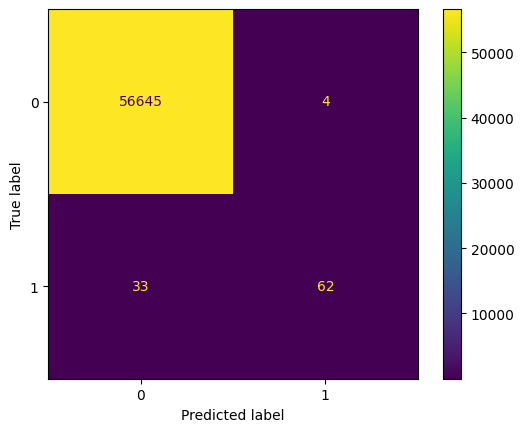

In [ ]:
# визуализация результатов
cm = confusion_matrix(y_test, pred, labels=clf15.classes_) # создание массива матрицы
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf15.classes_) # создание display matrix
disp.plot() # вывод матрицы

По матрице мы видим что модель практически не ошибается на обычных операциях, но примерно треть мошеннических операций она признает обычными. Что является неплохим результатом при нашем наборе данных.

# Выводы

Мы обучили модель для распознавания мошеннических операций. При нашем наборе данных где очень мало примеров мошеннических операций получить хороший результат тяжело.

В результате модель практически со стопроцентной вероятностью не примет обычную операцию за мошенническую, но примерно в трети случаев она примет мошенническую за обычную. Такой результат является не самым хорошым показателем, но получить результат сильно лучше практически не реально на подобном датасете.

**Итоги: модель хорошо обучена(*если принимать во внимание особенности датасета*) и способна выявлять мошеннические операции.**